In [79]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


In [80]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [81]:
start_year = 2011
end_year = 2019
read_cols = ["State", "FCEV Sales", "BEV Sales", "PHEV Sales"]
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_48076\2620802936.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_48076\2620802936.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_48076\2620802936.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_48076\2620802936.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_48076\262080293

In [82]:
df

,State,FCEV Sales,BEV Sales,PHEV Sales,year
0,Alabama,0,18,55,2011
1,Alaska,0,2,4,2011
2,Arizona,0,355,102,2011
3,Arkansas,0,2,20,2011
4,California,19,5062,1656,2011
...,...,...,...,...,...
47,Washington,0,9039,3611,2018
48,West Virginia,0,95,123,2018
49,Wisconsin,0,1168,788,2018
50,Wyoming,0,61,31,2018


In [83]:
df['State'] = df['State'].replace("District of Columbia", "District Of Columbia")

In [84]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [85]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,year,State Name,State Code,EPA Region
0,Alabama,0,18,55,2011,Alabama,1.0,4.0
1,Alaska,0,2,4,2011,Alaska,2.0,10.0
2,Arizona,0,355,102,2011,Arizona,4.0,9.0
3,Arkansas,0,2,20,2011,Arkansas,5.0,6.0
4,California,19,5062,1656,2011,California,6.0,9.0
...,...,...,...,...,...,...,...,...
411,Washington,0,9039,3611,2018,Washington,53.0,10.0
412,West Virginia,0,95,123,2018,West Virginia,54.0,3.0
413,Wisconsin,0,1168,788,2018,Wisconsin,55.0,5.0
414,Wyoming,0,61,31,2018,Wyoming,56.0,8.0


In [86]:
# mdf['ev_sales'] = mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] + mdf["HEV Sales"]
mdf['ev_sales'] =  mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] 

In [87]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales
0,Alabama,0,18,55,2011,Alabama,1.0,4.0,73
1,Alaska,0,2,4,2011,Alaska,2.0,10.0,6
2,Arizona,0,355,102,2011,Arizona,4.0,9.0,457
3,Arkansas,0,2,20,2011,Arkansas,5.0,6.0,22
4,California,19,5062,1656,2011,California,6.0,9.0,6737
...,...,...,...,...,...,...,...,...,...
411,Washington,0,9039,3611,2018,Washington,53.0,10.0,12650
412,West Virginia,0,95,123,2018,West Virginia,54.0,3.0,218
413,Wisconsin,0,1168,788,2018,Wisconsin,55.0,5.0,1956
414,Wyoming,0,61,31,2018,Wyoming,56.0,8.0,92


In [88]:
total_us_ev_sales = mdf[mdf['State'] == 'Total US']['ev_sales'].tolist()[0]
mdf['us_percent'] = (mdf['ev_sales']*100)/total_us_ev_sales

In [89]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales,us_percent
0,Alabama,0,18,55,2011,Alabama,1.0,4.0,73,0.449563
1,Alaska,0,2,4,2011,Alaska,2.0,10.0,6,0.03695
2,Arizona,0,355,102,2011,Arizona,4.0,9.0,457,2.814386
3,Arkansas,0,2,20,2011,Arkansas,5.0,6.0,22,0.135485
4,California,19,5062,1656,2011,California,6.0,9.0,6737,41.4891
...,...,...,...,...,...,...,...,...,...,...
411,Washington,0,9039,3611,2018,Washington,53.0,10.0,12650,77.903683
412,West Virginia,0,95,123,2018,West Virginia,54.0,3.0,218,1.34253
413,Wisconsin,0,1168,788,2018,Wisconsin,55.0,5.0,1956,12.045818
414,Wyoming,0,61,31,2018,Wyoming,56.0,8.0,92,0.566572


In [90]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [91]:
plot_df_carb = mdf_carb.groupby(['year'])[["FCEV Sales", "BEV Sales", "PHEV Sales", "ev_sales"]].sum().reset_index()
plot_df_noncarb = mdf_noncarb.groupby(['year'])[["FCEV Sales", "BEV Sales", "PHEV Sales", "ev_sales"]].sum().reset_index()

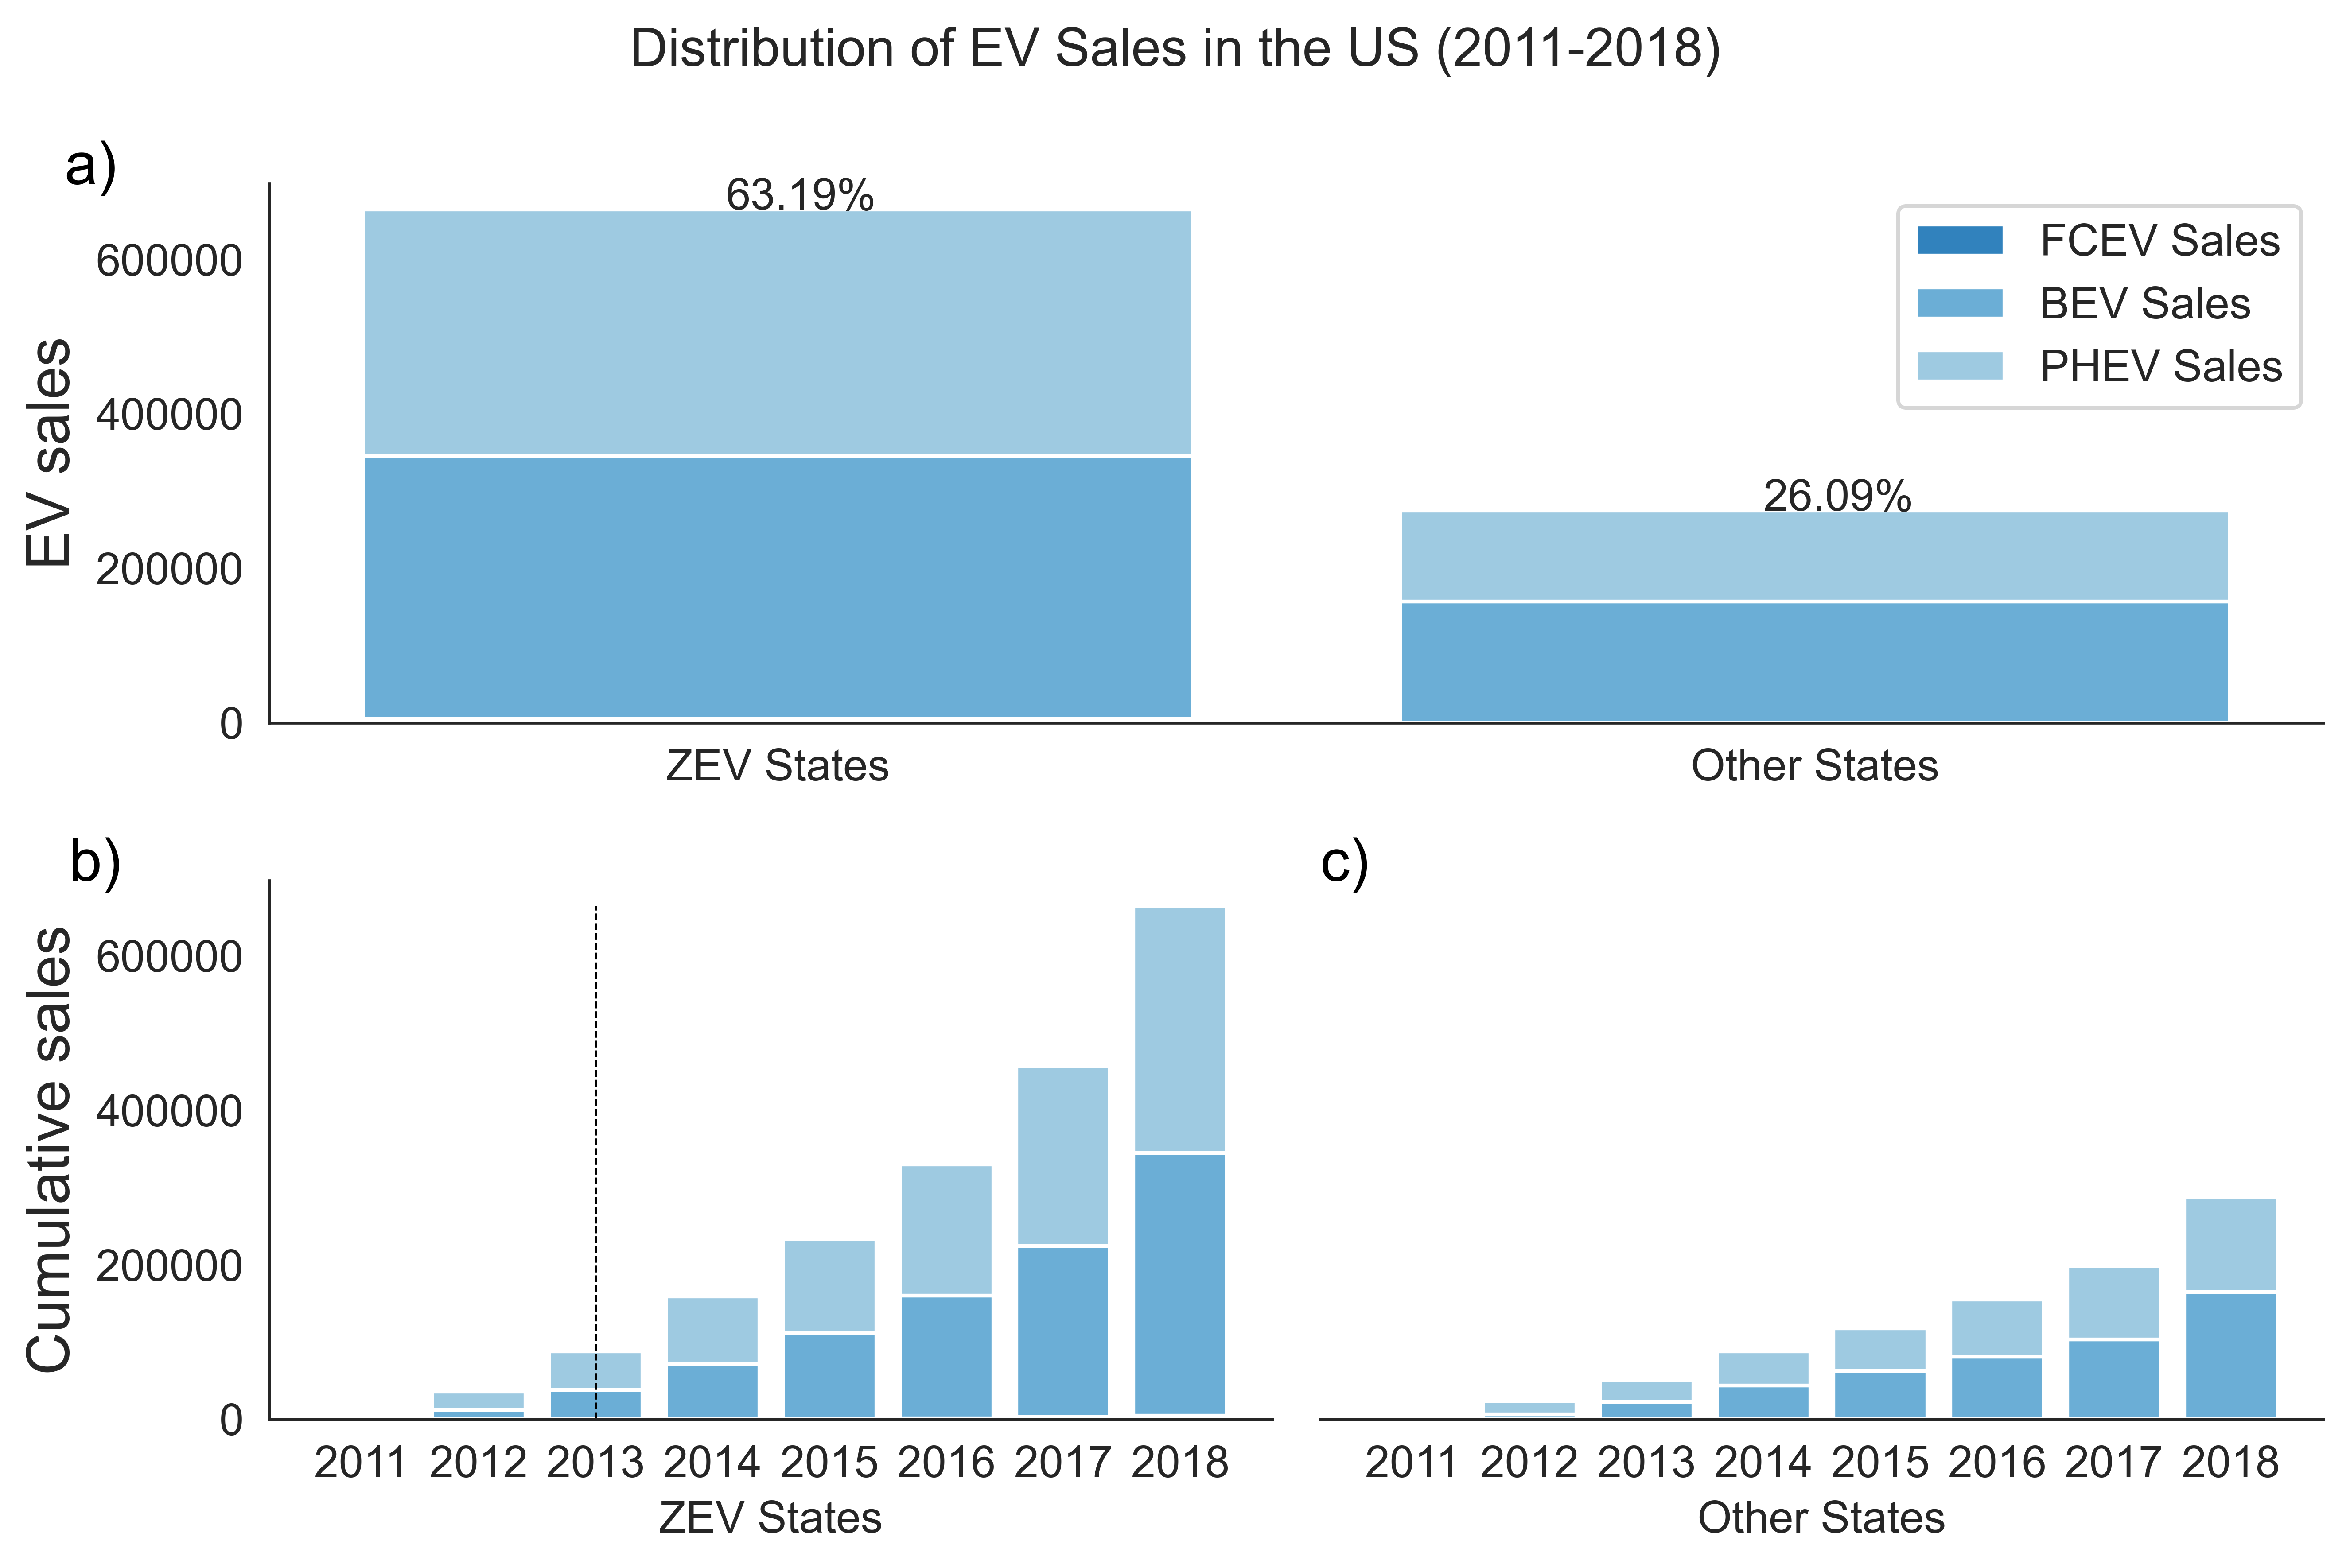

In [117]:
plt.rcParams.update({'font.size': 12})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

plt.figure(figsize=(9, 6), dpi=600)
gs = gridspec.GridSpec(2, 2)
#####

tmdf_carb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_zev_sales", start_year, end_year))
tmdf_noncarb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_zev_sales", start_year, end_year))

ax = plt.subplot(gs[0, :])
ax.text(-0.1, 1, "a)", transform=ax.transAxes, size=16, color='black')

label = ['ZEV States', 'Other States']
fcev_sales = [tmdf_carb['FCEV Sales'].sum(), tmdf_noncarb['FCEV Sales'].sum()]
bev_sales = [tmdf_carb['BEV Sales'].sum(), tmdf_noncarb['BEV Sales'].sum()]
phev_sales = [tmdf_carb['PHEV Sales'].sum(), tmdf_noncarb['PHEV Sales'].sum()]
y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

ax.text(-0.05, y1, "{:.2f}%".format(tmdf_carb['us_percent'].sum())) 
ax.text(0.95, y2, "{:.2f}%".format(tmdf_noncarb['us_percent'].sum())) 

plt.bar(label, fcev_sales, label = 'FCEV Sales', color = cmap(0))
plt.bar(label, bev_sales, bottom = fcev_sales, label = 'BEV Sales', color = cmap(1))
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], label='PHEV Sales', color = cmap(2))
plt.legend(loc='upper right')
plt.ylabel("EV sales", size=16)
sns.despine()

######
ax = plt.subplot(gs[1, 0])
ax.text(-0.2, 1, "b)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_carb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_carb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_carb['PHEV Sales'].tolist())

maxy = max(np.cumsum(plot_df_carb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Sales')

# plt.legend(loc='upper left')
plt.vlines(label.index('2013'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2018'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2019'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
plt.xlabel('ZEV States')
plt.ylabel("Cumulative sales", size=16)
sns.despine()

#########
ax = plt.subplot(gs[1, 1])
ax.text(0, 1, "c)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Sales'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Sales')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)
plt.xlabel('Other States')

plt.ylim(0, maxy)
plt.suptitle("Distribution of EV Sales in the US (2011-2018)")
plt.tight_layout()

plt.savefig("{}/{}_{}_{}.png".format(OUTPUT_IMAGE, "zev_sales", start_year, end_year), bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 16})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(8,5))
ax.text(0, 1, "c)", transform=ax.transAxes, size=22, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Sales'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Sales')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)

plt.ylim(0, maxy)
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_c"), bbox_inches='tight')
plt.show()

In [34]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region
322,Delaware,10,3
325,District Of Columbia,11,3
2254,Pennsylvania,42,3
2966,Washington,53,10


In [37]:
epa_region[epa_region['State Name'] == 'Minnesota']

,State Name,State Code,EPA Region
1322,Minnesota,27,5


In [79]:
mdf_carb

,State,FCEV Sales,BEV Sales,PHEV Sales,HEV Sales,State Name,State Code,EPA Region,ev_sales,us_percent
3,California,4755,263434,217325,608538,California,6.0,9.0,485514,49.297768
4,Connecticut,1,4643,5546,21202,Connecticut,9.0,1.0,10190,1.034665
15,Maine,0,568,1646,8854,Maine,23.0,1.0,2214,0.224804
16,Maryland,3,8003,8210,51657,Maryland,24.0,3.0,16216,1.646528
17,Massachusetts,0,10133,11388,51465,Massachusetts,25.0,1.0,21521,2.185184
25,New Jersey,1,11661,12929,53320,New Jersey,34.0,2.0,24591,2.496903
26,New York,2,15908,27794,111348,New York,36.0,2.0,43704,4.437585
31,Oregon,0,11960,7919,43312,Oregon,41.0,10.0,19879,2.018459
32,Rhode Island,0,674,1135,5854,Rhode Island,44.0,1.0,1809,0.183681
39,Vermont,0,985,2151,6434,Vermont,50.0,1.0,3136,0.318421
